# Задание

Используемый набор данных — данные магазина. Он управляет более чем 3000 аптек в 7 европейских странах. Задача — предсказать их ежедневные продажи на срок до шести недель вперед:
1. EDA
2. Анализ временных рядов 
3. Прогнозирование моделирование
4. Результаты
5. Презентация

# Загрузка и описание

In [152]:
import numpy as np
import pandas as pd

store = pd.read_csv('store.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

C:\Users\Gena\AppData\Local\Temp\ipykernel_18300\4163587292.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


In [179]:
print(store.shape)
print(train.shape)
print(test.shape)

(1115, 15)
(844392, 17)
(35093, 14)


In [181]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Store                           1115 non-null   int64  
 1   CompetitionDistance             1115 non-null   float64
 2   CompetitionOpenSinceMonth       1115 non-null   float64
 3   CompetitionOpenSinceYear        1115 non-null   float64
 4   Promo2                          1115 non-null   int64  
 5   Promo2SinceWeek                 1115 non-null   float64
 6   Promo2SinceYear                 1115 non-null   float64
 7   StoreType_b                     1115 non-null   bool   
 8   StoreType_c                     1115 non-null   bool   
 9   StoreType_d                     1115 non-null   bool   
 10  Assortment_b                    1115 non-null   bool   
 11  Assortment_c                    1115 non-null   bool   
 12  PromoInterval_Jan,Apr,Jul,Oct   11

In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Store            844392 non-null  int64 
 1   DayOfWeek        844392 non-null  int64 
 2   Sales            844392 non-null  int64 
 3   Customers        844392 non-null  int64 
 4   Open             844392 non-null  int64 
 5   Promo            844392 non-null  int64 
 6   SchoolHoliday    844392 non-null  int64 
 7   StateHoliday__0  844392 non-null  bool  
 8   StateHoliday__a  844392 non-null  bool  
 9   StateHoliday__b  844392 non-null  bool  
 10  StateHoliday__c  844392 non-null  bool  
 11  Year             844392 non-null  int32 
 12  Month            844392 non-null  int32 
 13  Week             844392 non-null  UInt32
 14  Day              844392 non-null  int32 
 15  DayOfYear        844392 non-null  int32 
 16  IsWeekend        844392 non-null  int64 
dtypes: UInt32(1), 

Описание данных:

Id — идентификатор, представляющий дуплет (Магазин, Дата) в тестовом наборе

Магазин — уникальный идентификатор для каждого магазина

Продажи — товарооборот за любой заданный день (это то, что вы прогнозируете)

Клиенты — количество клиентов в заданный день

Открыто — индикатор того, был ли магазин открыт: 0 = закрыт, 1 = открыт

StateHoliday — указывает на государственный праздник. Обычно все магазины, за редким исключением, закрыты в государственные праздники. Обратите внимание, что все школы закрыты в государственные праздники и выходные. a = государственный праздник, b = пасхальные каникулы, c = рождество, 0 = нет

SchoolHoliday — указывает, повлияло ли закрытие государственных школ на (Магазин, Дата)

StoreType — различает 4 модели магазинов: a, b, c, d

Assortment — описывает уровень ассортимента: a = базовый, b = дополнительный, c = расширенный

CompetitionDistance — расстояние в метрах до ближайшего магазина-конкурента

CompetitionOpenSince[Month/Year] — указывает примерный год и месяц открытия ближайшего магазина-конкурента

Promo — указывает, проводит ли магазин промо-акцию в этот день

Promo2 — Promo2 — это продолжающаяся и последовательная акция для некоторых магазинов: 0 = магазин не участвует, 1 = магазин участвует

Promo2Since[Year/Week] — описывает год и календарную неделю, когда магазин начал участвовать в Promo2

PromoInterval — описывает последовательные интервалы начала Promo2, называя месяцы акция начинается заново. Например, "Фев,Май,Авг,Нояб" означает, что каждый раунд начинается в феврале, мае, августе, ноябре любого года для этого магазина

# Предобработка

## train и test

In [153]:
print(train.head())
train.info()

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 n

In [154]:
print(test.head())
test.info()

   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null

In [155]:
print(train['StateHoliday'].unique())
print(test['StateHoliday'].unique())
print(train['Open'].unique())
print(test['Open'].unique())

['0' 'a' 'b' 'c' 0]
['0' 'a']
[1 0]
[ 1. nan  0.]


In [156]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [157]:
test['Open'] = test['Open'].fillna(0).astype(int)
test['Open'] = test['Open'].astype(int)

In [158]:
train['StateHoliday'] = train['StateHoliday'].astype(str)
train = pd.get_dummies(train, columns=['StateHoliday'], prefix='StateHoliday_')

test['StateHoliday'] = test['StateHoliday'].astype(str)
test = pd.get_dummies(test, columns=['StateHoliday'], prefix='StateHoliday_')

In [159]:
for df in [train, test]:
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Week"] = df["Date"].dt.isocalendar().week
    df["Day"] = df["Date"].dt.day
    df["DayOfYear"] = df["Date"].dt.dayofyear
    df["IsWeekend"] = df["DayOfWeek"].isin([6, 7]).astype(int)
    df.drop(["Date"], axis=1, inplace=True)

In [160]:
# алсо убрать закрытые магазины
train = train[train["Open"] == 1].copy()
test = test[test["Open"] == 1].copy()

## store

In [161]:
print(store.head())
store.info()

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [162]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)
store['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
store['CompetitionOpenSinceYear'].fillna(0, inplace=True)
store['Promo2SinceWeek'].fillna(0, inplace=True)
store['Promo2SinceYear'].fillna(0, inplace=True)
store['PromoInterval'].fillna("None", inplace=True)
store = pd.get_dummies(store, columns=['StoreType', 'Assortment', 'PromoInterval'], drop_first=True)


C:\Users\Gena\AppData\Local\Temp\ipykernel_18300\159425780.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)
C:\Users\Gena\AppData\Local\Temp\ipykernel_18300\159425780.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

## results

In [163]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Store                           1115 non-null   int64  
 1   CompetitionDistance             1115 non-null   float64
 2   CompetitionOpenSinceMonth       1115 non-null   float64
 3   CompetitionOpenSinceYear        1115 non-null   float64
 4   Promo2                          1115 non-null   int64  
 5   Promo2SinceWeek                 1115 non-null   float64
 6   Promo2SinceYear                 1115 non-null   float64
 7   StoreType_b                     1115 non-null   bool   
 8   StoreType_c                     1115 non-null   bool   
 9   StoreType_d                     1115 non-null   bool   
 10  Assortment_b                    1115 non-null   bool   
 11  Assortment_c                    1115 non-null   bool   
 12  PromoInterval_Jan,Apr,Jul,Oct   11

In [164]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35093 entries, 0 to 41087
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               35093 non-null  int64 
 1   Store            35093 non-null  int64 
 2   DayOfWeek        35093 non-null  int64 
 3   Open             35093 non-null  int64 
 4   Promo            35093 non-null  int64 
 5   SchoolHoliday    35093 non-null  int64 
 6   StateHoliday__0  35093 non-null  bool  
 7   StateHoliday__a  35093 non-null  bool  
 8   Year             35093 non-null  int32 
 9   Month            35093 non-null  int32 
 10  Week             35093 non-null  UInt32
 11  Day              35093 non-null  int32 
 12  DayOfYear        35093 non-null  int32 
 13  IsWeekend        35093 non-null  int64 
dtypes: UInt32(1), bool(2), int32(4), int64(7)
memory usage: 2.9 MB


In [165]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Store            844392 non-null  int64 
 1   DayOfWeek        844392 non-null  int64 
 2   Sales            844392 non-null  int64 
 3   Customers        844392 non-null  int64 
 4   Open             844392 non-null  int64 
 5   Promo            844392 non-null  int64 
 6   SchoolHoliday    844392 non-null  int64 
 7   StateHoliday__0  844392 non-null  bool  
 8   StateHoliday__a  844392 non-null  bool  
 9   StateHoliday__b  844392 non-null  bool  
 10  StateHoliday__c  844392 non-null  bool  
 11  Year             844392 non-null  int32 
 12  Month            844392 non-null  int32 
 13  Week             844392 non-null  UInt32
 14  Day              844392 non-null  int32 
 15  DayOfYear        844392 non-null  int32 
 16  IsWeekend        844392 non-null  int64 
dtypes: UInt32(1), 

# Merge DF

In [166]:
train_merged = train.merge(store, on="Store", how="left")
test_merged = test.merge(store, on="Store", how="left")

# 1. EDA

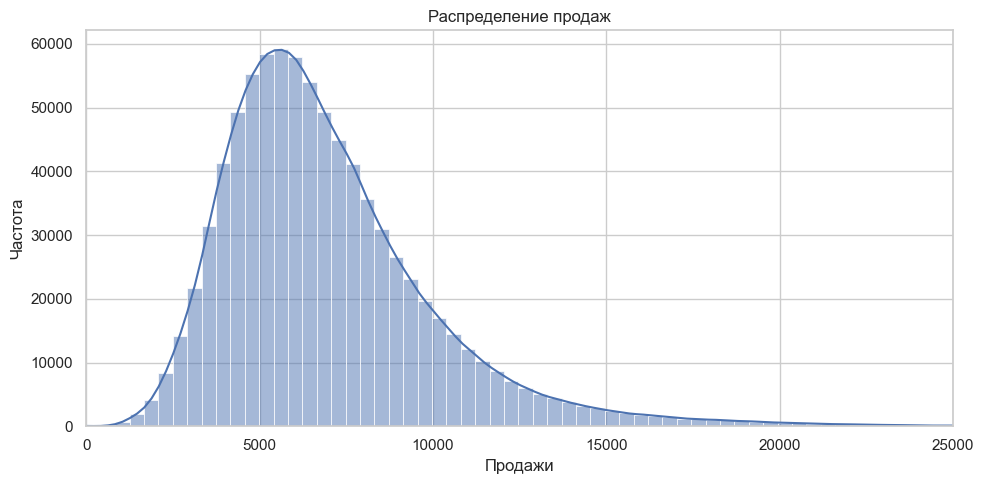

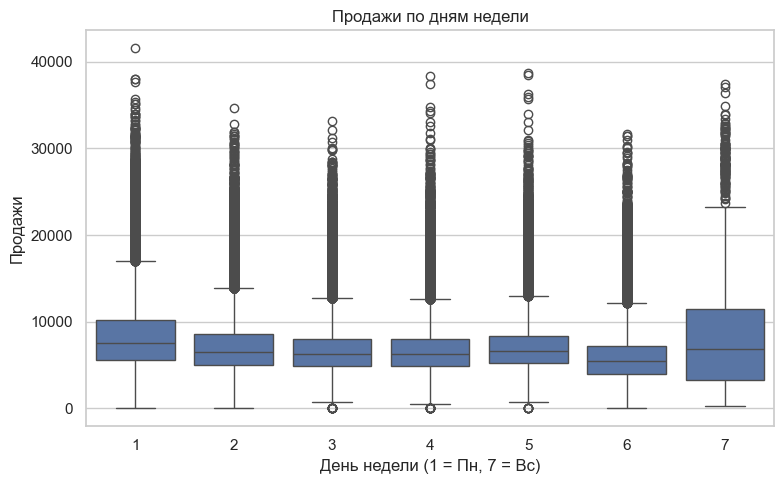

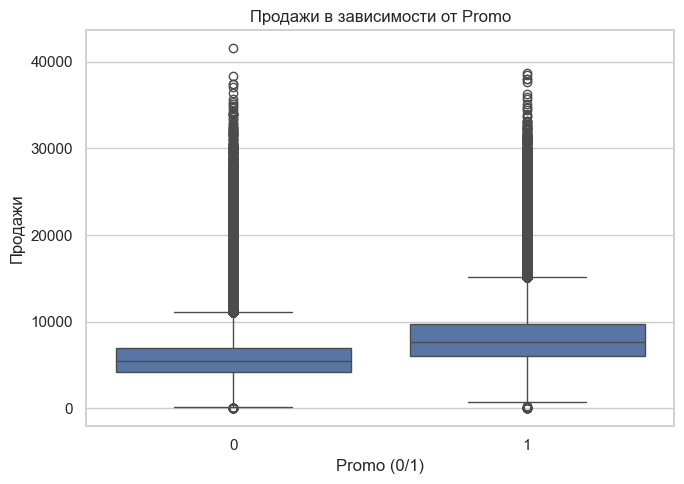

(54, '0.01%')

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# 1. Распределение продаж
plt.figure(figsize=(10, 5))
sns.histplot(train_merged["Sales"], bins=100, kde=True)
plt.title("Распределение продаж")
plt.xlabel("Продажи")
plt.ylabel("Частота")
plt.xlim(0, 25000) 
plt.tight_layout()
plt.show()

# 2. Продажи по дням недели
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_merged, x="DayOfWeek", y="Sales")
plt.title("Продажи по дням недели")
plt.xlabel("День недели (1 = Пн, 7 = Вс)")
plt.ylabel("Продажи")
plt.tight_layout()
plt.show()

# 3. Продажи при наличии промо
plt.figure(figsize=(7, 5))
sns.boxplot(data=train_merged, x="Promo", y="Sales")
plt.title("Продажи в зависимости от Promo")
plt.xlabel("Promo (0/1)")
plt.ylabel("Продажи")
plt.tight_layout()
plt.show()

# 4. Нулевые продажи
zero_sales = train_merged[train_merged["Sales"] == 0].shape[0]
total_rows = train_merged.shape[0]
zero_sales_percent = 100 * zero_sales / total_rows

zero_sales, f"{zero_sales_percent:.2f}%"


# 2. Анализ временных рядов

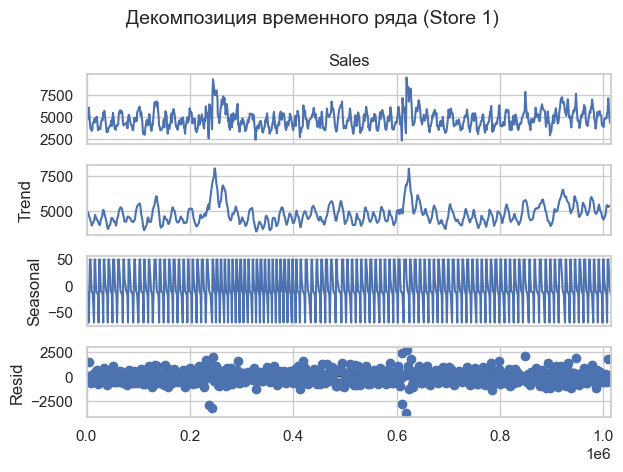

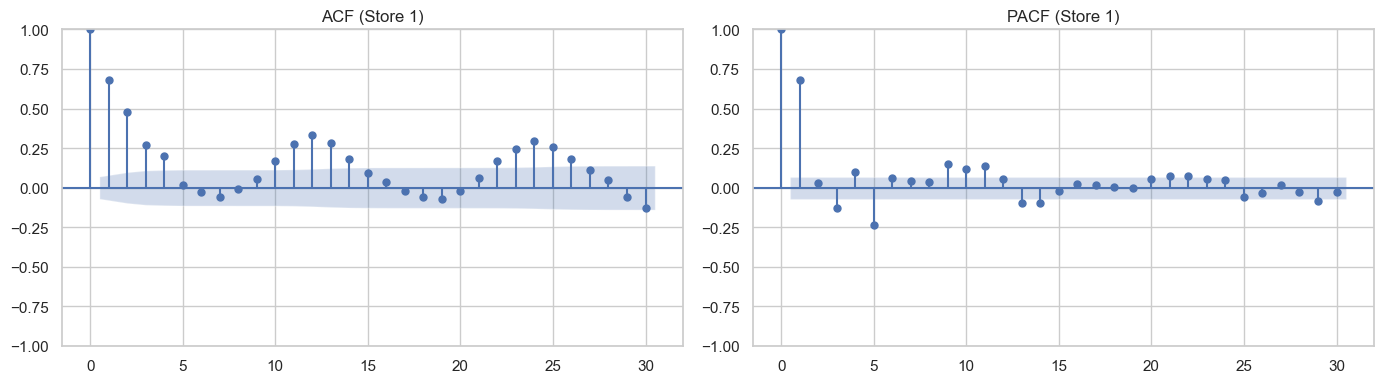

ADF p-value: 3.1839264972729856e-06


In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

try:
    s = int(input())
except:
    s = 1
# Фильтруем по Store = 1 и открытым дням
store1_df = train_merged[(train_merged["Store"] == s) & (train_merged["Open"] == 1)].copy()

decomposition = seasonal_decompose(store1_df["Sales"], model="additive", period=7)
decomposition.plot()
plt.suptitle("Декомпозиция временного ряда (Store 1)", fontsize=14)
plt.tight_layout()
plt.show()

adf_result = adfuller(store1_df["Sales"])
adf_pvalue = adf_result[1]

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plot_acf(store1_df["Sales"], lags=30, ax=plt.gca())
plt.title("ACF (Store 1)")

plt.subplot(1, 2, 2)
plot_pacf(store1_df["Sales"], lags=30, ax=plt.gca(), method="ywm")
plt.title("PACF (Store 1)")

plt.tight_layout()
plt.show()

print(f"ADF p-value: {adf_pvalue}")

# 3. Прогнозирование, моделирование

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

X_train = train_merged.drop('Sales', axis=1)
y_train = train_merged['Sales']
X_test = test_merged

In [169]:
train_features = X_train.columns
for col in train_features:
    if col not in X_test.columns:
        X_test[col] = 0  
X_test = X_test[train_features]

In [170]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

train_preds = model.predict(X_train)

mae = mean_absolute_error(y_train, train_preds)
rmse = root_mean_squared_error(y_train, train_preds)
r2 = r2_score(y_train, train_preds)

print(f"Train MAE: {mae:.2f}")
print(f"Train RMSE: {rmse:.2f}")
print(f"Train R2: {r2:.4f}")

Train MAE: 929.47
Train RMSE: 1277.32
Train R2: 0.8307


In [171]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

train_preds = model.predict(X_train)

mae = mean_absolute_error(y_train, train_preds)
rmse = root_mean_squared_error(y_train, train_preds)
r2 = r2_score(y_train, train_preds)

print(f"Train MAE: {mae:.2f}")
print(f"Train RMSE: {rmse:.2f}")
print(f"Train R2: {r2:.4f}")

Train MAE: 566.57
Train RMSE: 773.01
Train R2: 0.9380


In [172]:
test_preds = model.predict(X_test)

predicted = pd.DataFrame()
predicted["Date"] = pd.to_datetime(dict(year=test_merged["Year"],
                                         month=test_merged["Month"],
                                         day=test_merged["Day"]))
predicted["Store"] = test_merged["Store"]
predicted["PredictedSales"] = test_preds

predicted.head()

,Date,Store,PredictedSales
0,2015-09-17,1,2022.169540
1,2015-09-17,3,2343.529136
2,2015-09-17,7,2303.708169
3,2015-09-17,8,2160.992208
4,2015-09-17,9,2449.678458


In [173]:
try:
    s = int(input())
except:
    s = 1
predicted[predicted["Store"] == s].sort_values("Date")

,Date,Store,PredictedSales
34237,2015-08-01,1,1871.120673
33354,2015-08-03,1,2457.648947
32498,2015-08-04,1,2286.201628
31642,2015-08-05,1,2159.811143
30786,2015-08-06,1,2068.399824
29930,2015-08-07,1,2068.399824
29082,2015-08-08,1,1623.032260
28199,2015-08-10,1,1706.004617
27343,2015-08-11,1,1677.690820
26487,2015-08-12,1,1677.690820


# 4. Результаты

Построил EDA и проанализировал временные ряды, предварительно обработав все три датасета и замерджив их между собой.

Проверил точность двух моделей: LinearRegressor и HistGradientBoostingRegressor

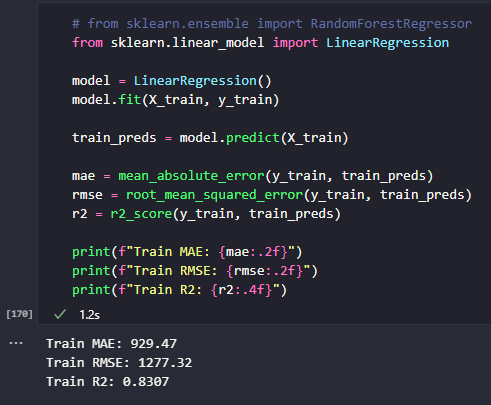
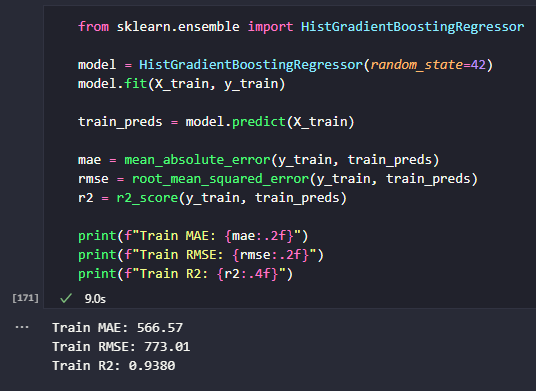

В результате выбрал наиболее точную и предсказал продажи как для всех магазинов по отдельности, так и с возможностью затем выбрать какой-то конкретный из них.

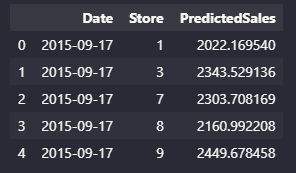
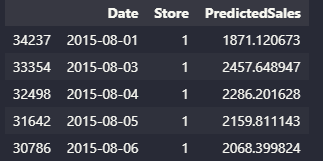